# Data structure and Algo in Pythonic code

## 1. Graph

### 1.1. DFS (Depth First Search)

#### DFS

In [1]:
def dfs(graph, start, path=[]):
    """
    Assuming the graph is as below (for visualization using networkx, refer to the part 2 of this Jupyter Notebook):
        A
      /   \
      B--D--C
       \ | /
         E
    
    graph = {'A':['B','C'],'B':['D','E'],'C':['D','E'],'D':['E'],'E':['A']}
    
    The handwriting (or we can print() at code):
    Step 1: Initialization
            graph = {'A':['B','C'],'B':['D','E'],'C':['D','E'],'D':['E'],'E':['A']}
            start = 'A'
            path=[]
            stack = [start] # = 'A'
    Step 2: v = 'A'
            stack = []
            path = ['A']
            stack = ['B', 'C']
    Step 3: v = ['B']
            stack = ['C']
            path = ['A', 'B']
            stack = ['D', 'E', 'C']  # Note the order of stack
    Step 4: v = 'D'
            stack = ['E', 'C']
            path = ['A', 'B', 'D']
            stack = ['E', 'E', 'C']  # Note the order of stack
    Step 5: v = 'E'
            stack = ['E', 'C']
            path = ['A', 'B', 'D', 'E']
            stack = ['A', 'E', 'C']
    Step 6: v = 'A'
            stack = ['E', 'C']
            Others not change
    Step 7: v = 'E'
            stack = ['C']
            Others not change
    Step 8: v = 'C'
            stack = []
            path = ['A', 'B', 'D', 'E', 'C']
            stack = ['D', 'E']
    Step 9: v = 'D'
            stack = ['E']
            Others not change
    Step 10: v = 'E'
            stack = []
            Others not change
    Finish       
    """
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    stack = [start]
    while stack:
        v = stack.pop(0)
        if v not in path:
            path = path + [v]
            stack = graph[v] + stack
    return path

In [2]:
# Test
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = dfs(graph=graph, 
           start='A')  
path  # ['A', 'B', 'D', 'E', 'C']

['A', 'B', 'D', 'E', 'C']

#### unittest

In [3]:
import unittest

In [4]:
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

class DFStest(unittest.TestCase):
    def test_dfs(self):
        self.assertSequenceEqual(dfs(graph, start="A", path=[]), ['A', 'B', 'D', 'E', 'C'])

In [5]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


#### dfs (recursion)

In [6]:
def dfs_recursion(graph, start, path=[]):
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    path = path + [start]
    for node in graph[start]:
        if not node in path:
            path = dfs_recursion(graph, node, path)
    return path

In [7]:
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = dfs_recursion(graph, start="A", path=[])
path  # ['A', 'B', 'D', 'E', 'C']

['A', 'B', 'D', 'E', 'C']

### 1.2. BFS (Breath First Search)

#### bfs

In [8]:
def bfs(graph, start, path=[]):
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    queue = [start]
    while queue:
        v = queue.pop(0)
        if v not in path:
            path = path + [v]
            queue = queue + graph[v]  # The difference with dfs is only here. Note the "order".
    return path

In [9]:
# Test
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = bfs(graph=graph,  
           start='A')  
path  # ['A', 'B', 'C', 'D', 'E']

['A', 'B', 'C', 'D', 'E']

#### unittest

In [10]:
import unittest

graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

class BFStest(unittest.TestCase):
    def test_bfs(self):
        self.assertSequenceEqual(bfs(graph=graph, start='A'), ['A', 'B', 'C', 'D', 'E'])

In [11]:
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK


### 1.3. find path (using backtracking)

In [17]:
# https://www.python.org/doc/essays/graphs/
def find_path(graph, start, end, path=[]):
    """
    To find one path from node start to node end
    """
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    for node in graph[start]:
        if node not in path:
            newpath = find_path(graph, node, end, path)
            if newpath: return newpath
    return None

In [18]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

path = find_path(graph, start='A', end='D', path=[])
path

['A', 'B', 'C', 'D']

### 1.4. find all paths

In [19]:
def find_all_paths(graph, start, end, path=[]):
    """
    To find all possible paths from node start to node end.
    """
    path = path + [start]
    if start==end:
        return [path]
    if start not in graph.keys():
        return []
    
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [20]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

paths = find_all_paths(graph, start='A', end='D', path=[])
paths

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

### 1.5. find shortest path

In [21]:
def find_shortest_path(graph, start, end, path=[]):
    """
    To find a shotest path from node start to node end.
    """
    path = path + [start]
    if start==end:
        return path
    if start not in graph.keys():
        return None
    
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = find_shortest_path(graph, node, end, path)
            if newpath:
                if not shortest or len(shortest) > len(newpath):
                    shortest = newpath
    return shortest

In [22]:
graph = {'A': ['B', 'C'],
         'B': ['C', 'D'],
         'C': ['D'],
         'D': ['C'],
         'E': ['F'],
         'F': ['C']}

shortest_path = find_shortest_path(graph, start='A', end='D', path=[])
shortest_path

['A', 'B', 'D']

In [56]:
edges = [
        ("A", "B"),
        ("A", "D"),
        ("B", "C"),
        ("B", "D"),
        ("B", "E"),
        ("C", "E"),
        ("D", "E"),
        ("D", "F"),
        ("E", "F"),
        ("E", "G"),
        ("F", "G")
    ]
from collections import defaultdict
graph = defaultdict(list)
for k, v in edges:
    graph[k].append(v)
    
graph = dict(graph)
print("graph = ", graph)
print("shortest_path: from A to E =", find_shortest_path(graph, start='A', end='E'))
print("shortest_path: from F to G =", find_shortest_path(graph, start='F', end='G'))     

graph =  {'A': ['B', 'D'], 'B': ['C', 'D', 'E'], 'C': ['E'], 'D': ['E', 'F'], 'E': ['F', 'G'], 'F': ['G']}
shortest_path: from A to E = ['A', 'B', 'E']
shortest_path: from F to G = ['F', 'G']


### 1.6. Making a graph as a dict-like object

In [41]:
"""
To transform list of tuple to list of dics and vice versa
"""
from collections import defaultdict

# In this case, each edge has a different weight
# To find a shortest path where each edge has weight --> Use dijkstra algo.
edges = [('A', 'B', 2),
         ('A', 'D', 4),
         ('B', 'C', 5),
         ('B', 'D', 1),
         ('B', 'E', 7),
         ('C', 'E', 10)]

graph = defaultdict(list)
for k, v, w in edges:
    graph[k].append({v:w})
    
# Change to Python dict if needed
graph = dict(graph) 

print("edged = {} \ngraph = {}".format(edges, graph))

# Changing graph back to list of tuple
_edges = []
for k, dics in graph.items():
    for dic in dics:
        for v, w in dic.items():
            _edges.append((k, v , w))
print('get edges back from graph = ', _edges)

edged = [('A', 'B', 2), ('A', 'D', 4), ('B', 'C', 5), ('B', 'D', 1), ('B', 'E', 7), ('C', 'E', 10)] 
graph = {'A': [{'B': 2}, {'D': 4}], 'B': [{'C': 5}, {'D': 1}, {'E': 7}], 'C': [{'E': 10}]}
get edges back from graph =  [('A', 'B', 2), ('A', 'D', 4), ('B', 'C', 5), ('B', 'D', 1), ('B', 'E', 7), ('C', 'E', 10)]


### 1.7. dijkstra algorithm to find a shortest path of a "weighted" graph

In [44]:
from collections import defaultdict
from heapq import *

def dijkstra(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    q, seen, mins = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf")

In [48]:
edges = [
        ("A", "B", 7),
        ("A", "D", 5),
        ("B", "C", 8),
        ("B", "D", 9),
        ("B", "E", 7),
        ("C", "E", 5),
        ("D", "E", 15),
        ("D", "F", 6),
        ("E", "F", 8),
        ("E", "G", 9),
        ("F", "G", 11)
    ]

print ("A -> E:")
print (dijkstra(edges, "A", "E"))
print ("F -> G:")
print (dijkstra(edges, "F", "G"))

A -> E:
(14, ('E', ('B', ('A', ()))))
F -> G:
(11, ('G', ('F', ())))


In [50]:
def dijkstra_revised(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    # dist records the min value of each node in heap.
    q, seen, dist = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 in seen: continue

        seen.add(v1)
        path += (v1,)
        if v1 == t: return (cost, path)

        for c, v2 in g.get(v1, ()):
            if v2 in seen: continue

            # Not every edge will be calculated. The edge which can improve the value of node in heap will be useful.
            if v2 not in dist or cost+c < dist[v2]:
                dist[v2] = cost+c
                heappush(q, (cost+c, v2, path))

    return float("inf")

In [58]:
edges = [
        ("A", "B", 7),
        ("A", "D", 5),
        ("B", "C", 8),
        ("B", "D", 9),
        ("B", "E", 7),
        ("C", "E", 5),
        ("D", "E", 15),
        ("D", "F", 6),
        ("E", "F", 8),
        ("E", "G", 9),
        ("F", "G", 11)
    ]
print ("A -> E:")
print (dijkstra_revised(edges, "A", "E"))
print ("F -> G:")
print (dijkstra_revised(edges, "F", "G"))

A -> E:
(14, ('A', 'B', 'E'))
F -> G:
(11, ('F', 'G'))


## 2. Graph with networkx

> We can use networkx library to work and visualize graph  
> Ref: https://networkx.github.io/documentation/stable/tutorial.html

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

nodes of G1 =  ['A', 'B', 'C', 'D', 'E']
edges of G1 =  [('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')]


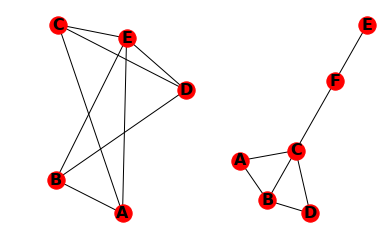

In [60]:
graph1 = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

graph2 = {'A': ['B', 'C'],
         'B': ['C', 'D'],
         'C': ['D'],
         'D': ['C'],
         'E': ['F'],
         'F': ['C']}

# Change graph to G in networkx
G1 = nx.Graph(graph1)
print("nodes of G1 = ", G1.nodes())
print('edges of G1 = ', G1.edges())
#nx.draw(G1)
G2 = nx.Graph(graph2)

plt.subplot(121)  #  (121) means: row=1, col=2 at first supplot
nx.draw(G1, with_labels=True, font_size=16, font_weight='bold')
plt.subplot(122)
nx.draw(G2, with_labels=True, font_size=16, font_weight='bold')
#plt.show()

## 3. Tree

``` Tree is just a specific case of graph ```

### 3.1. Create a generic tree

nodes of G =  ['A', 'A1', 'A2', 'A11', 'A12', 'A21', 'A22']
edges of G =  [('A', 'A1'), ('A', 'A2'), ('A1', 'A11'), ('A1', 'A12'), ('A2', 'A21'), ('A2', 'A22')]


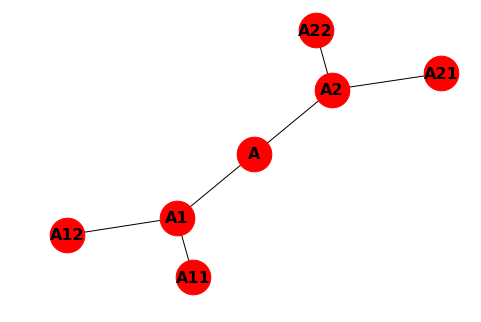

In [75]:
# Using list of tuple.
# Ex. a binary tree
import networkx as nx
import matplotlib.pyplot as plt

edges_of_tree = [('A', 'A1'), ('A', 'A2'), ('A1', 'A11'), ('A1', 'A12'), ('A2', 'A21'), ('A2', 'A22')]

# Change graph to G in networkx
G = nx.Graph(edges_of_tree)
print("nodes of G = ", G.nodes())
print('edges of G = ', G.edges())
nx.draw(G, with_labels=True, node_size=1200, font_size=16, font_weight='bold')

In [65]:
class Tree:
    def __init__(self, name='root', children=None):
        self.name = name
        self.children = []
        if children:
            for child in children:
                self.add_child(child)

    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)
        
    def __repr__(self):
        return self.name

In [76]:
tree = Tree('A', [Tree('A1'),
                  Tree('A2'),
                  Tree('A3', [Tree('3.1'),
                             Tree('3.2')])])

### 3.2. Find a root of a tree in a dict-like tree (graph)

In [88]:
from collections import defaultdict

# Given a list of tuple not in the order
edges_of_tree = [('A1', 'A11'), ('A', 'A2'),('A1', 'A12'), ('A2', 'A21'), ('A', 'A1'), ('A2', 'A22')]

tree = defaultdict(list)
for k, v in edges_of_tree:
    tree[k].append(v)
    
tree = dict(tree)
print("tree = ", tree)

# Find a root of this tree
def find_root(tree):
    node = list(tree.keys())[0] # Choose a random node, here choose first key
    found = False
    while not found:
        found = True
        for k, v in graph.items():
            if node in v:
                node = k
                found = False
    return node

print('root = ', find_root(tree))

tree =  {'A1': ['A11', 'A12'], 'A': ['A2', 'A1'], 'A2': ['A21', 'A22']}
root =  A


## 4. Hashtable - Python dict

> Hash table stores key-value pairs but the key is generated through a hashing function.  
> Python dict represent the implementation of hash tables.  
> https://en.wikipedia.org/wiki/Hash_table  
> https://stackoverflow.com/questions/114830/is-a-python-dictionary-an-example-of-a-hash-table  
> https://dbader.org/blog/python-dictionaries-maps-and-hashtables  

In [ ]:
dic = { 1.1: 'a', 4504.1: 'b' }
for k, v in dic.items():
    print('k={} with hash={}'.format(k, hash(k)))    

In [ ]:
# Ordered dict
import collections
d = collections.OrderedDict(One=1, Two=2, Three=3)
d['Four'] = 4
d

In [ ]:
# defaultdict: one way to make a graph
from collections import defaultdict
dd = defaultdict(list)
dd['A'].append('B')
dd['A'].append('C')
dd['A'].append('D')
dd

In [ ]:
# chainmap
from collections import ChainMap
dict1 = {'A': 1, 'B': 2}
dict2 = {'C': 3, 'D': 4}
chain = ChainMap(dict1, dict2)
print('chain = ', chain)
print("chain['C'] = ", chain['C'])
#print("chain['not_existed_key'] = ", chain['not_existed_key'])

In [ ]:
# hash table
# map(hash, (0, 1, 2, 3)) # <map at 0x25123fa048>
list(map(hash, (0, 1, 2, 3)))

In [ ]:
list(map(hash, ("A", "B", "AB", "BB")))

In [ ]:
# Just example to see how hash and dict work
dict_hash = {hash(v): v for v in ("A", "B", "AB", "BB")}
print("dict_hash = ", dict_hash)
# Now to find AB
hash_finding = hash('AB')
found = dict_hash[hash_finding]
print('found = ', found)